# Basics of Exploratory data analysis and statistics
In this lesson, we will look at the basic tools and procedures that are useful for analyzing a single variable. So we will not deal with the relationships and connections between several variables - this will be the subject of many other lessons. For this purpose, we will have a look at a simpler dataset. Visualizations which you have learned in previous lesson will help us here as well.
In order to work effectively with the data, we will still have to transform and purify the data, so called data cleaning and we will have a look at a more complex procedure. This is (unfortunately) a common part of data analysis, because the source data is typically not completely organized and often contains errors. 
Let's also have a look at the basics of statistics. We will learn how to work with the terms mean, standard deviation, median, quantile or quartile. 
In this lesson you will learn:
* read data from Excel files,
* efficiently clean and transform data into "ordered data",
* basic statistics of one variable, including the distribution function,


## Load libraries
We will of course use `pandas`, then [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/) for visualization.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## Data preparation

### Load raw data - weather

Our basic data set will be weather data, specifically in Prague - Ruzyně. The data are provided by the Czech Hydrometeorological Institute (CHMI) in the form of Excel files, available from http://portal.chmi.cz/historicka-data/pocasi/denni-data/data-ze-stanic-site-RBCN.
Getting data is usually hard part of any analysis. Until recently a concept of open data was not completely recognized and in some countries it is a constant fight. Austria is not really good example in open access to information. 

If we have a closer look at sheets in Excel file, we can clearly see that data are awkwardly organized even for usage in Excel. Working with them without cleaning would be a challenge. 

Loading the file itself is relatively easy. We will use the `ExcelFile` class for this, because in addition to loading, it also provides the `sheet_names` property.
Often it is enough (and easier) to use the [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel) function. Notice the large number of arguments in the documentation that allow you to properly load all-formatted files and the values in them.

In [6]:
RUZYNE_DATA_FILENAME = "P1PRUZ01.xlsx"

In [7]:
# open Excel 
excel_data_ruzyne = pd.ExcelFile(RUZYNE_DATA_FILENAME)

We will display a list of sheets in the file.

In [8]:
excel_data_ruzyne.sheet_names

['station geography',
 'average temperature',
 'max temperature',
 'min temperature',
 'wind speed',
 'atmospheric pressure',
 'humidity',
 'precipitation',
 'total snow depth',
 'sunshine']

We haven't loaded any data yet (we don't have any `DataFrame` with data from the file). We will use method [`parse`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.ExcelFile.parse.html#pandas.ExcelFile.parse) in order to load data into dataframe from a single sheet.

In [12]:
# read data from one sheet and display the first 5 lines
average_temperature = excel_data_ruzyne.parse("average temperature")
average_temperature.head(5)

,Average daily temperature of air in °C,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,station: P1PRUZ01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,year,month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
3,1961,01,-2.0,-1.9,0.1,-0.3,0.4,-0.3,0.8,1.0,...,-2.4,-3.4,-3.9,-7.4,-9.8,-10.3,-9.0,0.7,4.7,4.7
4,1961,02,1.3,1.2,0.5,0.7,-3.3,0.6,3.1,2.3,...,2.8,3.0,3.4,0.9,2.6,4.4,5.8,NaN,NaN,NaN


The result is not exactly what we want. Fortunately, the solution is simple - we just need to skip the first three lines. Just add `skiprows = 3`.

In [13]:
average_temperature = excel_data_ruzyne.parse("average temperature", skiprows = 3)
average_temperature.head(5)

,year,month,1.,2.,3.,4.,5.,6.,7.,8.,...,22.,23.,24.,25.,26.,27.,28.,29.,30.,31.
0,1961,1,-2.0,-1.9,0.1,-0.3,0.4,-0.3,0.8,1.0,...,-2.4,-3.4,-3.9,-7.4,-9.8,-10.3,-9.0,0.7,4.7,4.7
1,1961,2,1.3,1.2,0.5,0.7,-3.3,0.6,3.1,2.3,...,2.8,3.0,3.4,0.9,2.6,4.4,5.8,NaN,NaN,NaN
2,1961,3,2.1,3.9,4.4,3.1,5.7,4.7,7.2,6.8,...,0.5,5.2,7.1,6.6,10.1,3.5,1.3,4.7,7.4,4.8
3,1961,4,8.1,8.4,7.8,10.0,13.5,16.2,17.0,10.6,...,13.5,10.9,11.7,11.0,12.4,10.9,11.4,11.4,12.5,NaN
4,1961,5,10.3,12.4,11.8,12.1,16.2,14.3,11.8,8.3,...,11.8,13.6,14.6,16.3,15.8,12.3,6.2,6.7,8.3,13.2


This looks a little better - the rows and columns are as intended. But the problem is that the every day is like a column. Just because not every month has 31 days. Therefore, there are undefined values or `NaN` (Not a Number) in the last three columns.

Missing values may occur for reasons other than "just" improper data organization. E.g. the thermometer may have a fault, data has been corrupted, etc. Various abbreviations and symbols may be used for missing values, which is why there is a handy `na_values` argument.
For many good reasons, which you will see in practice, our goal is to get the data in the form of so-called [**tidy data**](https://en.wikipedia.org/wiki/Tidy_data), where **lines correspond to individual observation (measurements), the column names correspond to the quantities.**

Here comes the [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt) method. This is used for cases where values are encoded as columns. This is how we explain `melt` that the columns `["year", "month"]` are already correct as "quantities", that in the remaining columns there are values of the quantity `day` and that the values belong to the quantity `average temperature`, which will be used to create new column.

In [14]:
average_tidy_temperature = average_temperature.melt(id_vars = ["year", "month"], var_name = "day", value_name = "average temperature")
average_tidy_temperature.head(5)

,year,month,day,average temperature
0,1961,1,1.,-2.0
1,1961,2,1.,1.3
2,1961,3,1.,2.1
3,1961,4,1.,8.1
4,1961,5,1.,10.3


In this case, it was quite clear that the column names are actually values of some quantity. Sometimes it can be more hidden, eg. in the case of categorical variables. For example, we can get data from measuring the length of the legs in this format:

In [15]:
leg_length = pd.DataFrame({"left": [81, 81.4], "right": [78.2, 78]})
leg_length

,left,right
0,81.0,78.2
1,81.4,78.0


**Task:**    
Does `leg_length` look like tidy data? If not, can you organize this data correctly? 

Helpful question: Can the side of the leg be considered a (categorical) quantity?

### Creating a "correct" (time) index
We almost never want to work with separate columns "year", "month", etc. For working with time data and time series, there is already specialized class, especially [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp) and [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html), for differences between time data then [Timedelta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta). For an overview, see the documentation: [Time series/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). 

And believe me - it's not an easy problem. Time calculations contains working with decimal, sixty, twelve, twenty-four, seven, monthly, quarterly, annual, ... calculations. This includes time zones, leap years, daylight saving time, various calendars and who knows what else.
So let's create the "right" time index for our time series. The [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) function is often useful. This function can convert numeric or text data (individually or in batch) into the right Pandas type for working with time data.
It is useful for us that we can work with dates, where there are years, months, days, etc. in separate columns. We will show it on a simple example.

In [16]:
# example of a series of dates in separate columns
split_dates_example = pd.DataFrame(
    {"year": [2015, 2016], "month": [2, 3], "day": [4, 5]}
)
split_dates_example

,year,month,day
0,2015,2,4
1,2016,3,5


The `to_datetime` function creates a series (`Series`) of the type `datetime64 [ns]` from the sample table. This (numpy) type supports many useful methods for working with time data, see. [Datetimes and Timedeltas](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html). `[Ns]` indicates (default) nanosecond accuracy.

In [17]:
pd.to_datetime(split_dates_example)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

if your columns have a different names, you can rename them using `rename` method. We store the result in the new variable `date`.

In [19]:
datum = pd.to_datetime(
    average_tidy_temperature[["year", "month", "day"]],
)
    

ValueError: cannot assemble the datetimes: day is out of range for month

Almost - it ended with a rather logical error (exception) `ValueError: cannot assemble the datetimes: day is out of range for month`. (Fortunately) failed to convince the pandas that all months have 31 days :)
But we can use `errors ="coerce"` in order to ensure that all correct data be converted and that the incorrect data be marked as `NaN`, resp. in this case `NaT` - Not a Time.

In [20]:
datum = pd.to_datetime(
average_tidy_temperature[["year", "month", "day"]],
    errors="coerce",
)

In [21]:
datum

0       1961-01-01
1       1961-02-01
2       1961-03-01
3       1961-04-01
4       1961-05-01
           ...    
21571   2018-08-31
21572          NaT
21573   2018-10-31
21574          NaT
21575   2018-12-31
Length: 21576, dtype: datetime64[ns]

For complete time information, we should add time zone information. This will allow us to compare times correctly, or to capture summer and winter time, which is often a rather difficult problem. In our case of daily data, this is not absolutely essential, but in some cases it can manifest itself.
For time data that does not contain a time zone, we can use [`.dt.tz_localize`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize).

[`.dt.tz_convert`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tz_convert.html#pandas.DataFrame.tz_convert) is used for time zone conversion.
[`.dt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html#pandas.Series.dt) is a so-called *accessor object* for work with time properties of data.

In [23]:
datum_localized = datum.dt.tz_localize("Europe/Prague")
datum_localized

0       1961-01-01 00:00:00+01:00
1       1961-02-01 00:00:00+01:00
2       1961-03-01 00:00:00+01:00
3       1961-04-01 00:00:00+01:00
4       1961-05-01 00:00:00+01:00
                   ...           
21571   2018-08-31 00:00:00+02:00
21572                         NaT
21573   2018-10-31 00:00:00+01:00
21574                         NaT
21575   2018-12-31 00:00:00+01:00
Length: 21576, dtype: datetime64[ns, Europe/Prague]

Surely you have noticed that the time and, of course, the time zone and thus the offset from [UTC] have been added. `+01: 00` means +1 hour from UTC. For dates, the concept of the time zone is not entirely natural, which is why Pandas added time (`00: 00: 00`). However, since the importance of daily data is often a summary for a specific 24 hours (and sometimes for 23 hours and sometimes for 25 hours due to the alternation of summer and winter time), it is better to work at a specific time (beginning of the day). And this is also our case.

Now we just use `assign` to add the "date" column. You can verify that the subsequent analysis will work with the localized time in `datum_localized`.

In [25]:
average_tidy_temperature = average_tidy_temperature.assign(date = datum)
average_tidy_temperature

,year,month,day,average temperature,date
0,1961,1,1.,-2.0,1961-01-01
1,1961,2,1.,1.3,1961-02-01
2,1961,3,1.,2.1,1961-03-01
3,1961,4,1.,8.1,1961-04-01
4,1961,5,1.,10.3,1961-05-01
...,...,...,...,...,...
21571,2018,8,31.,15.7,2018-08-31
21572,2018,9,31.,NaN,NaT
21573,2018,10,31.,7.8,2018-10-31
21574,2018,11,31.,NaN,NaT


**Homework:**     
`to_datetime` can also work with strings, which is often useful. Convert `pyladies_times` to the appropriate type for time data, assign our time zone and then use `tz_convert` to convert to UTC. You may have to explain to the pandas that the dates in the Austria are at first position, unlike in America. Fortunately, one simple argument for `to_datetime` is enough.

In [26]:
pyladies_times = ["21.4.2020 18:00", "28.4.2020 18:00", "5.5.2020 18:00"]

In [ ]:
pandas_times = pd.to_datetime(___).___.___

### Data cleaning

What happened to undefined values? They stayed there. Let's see how to find out and what can be done about it.
In general, we have three basic options.
1. Do nothing, ie leave the missing data missing. This is perhaps surprisingly often a good choice, as many features handle the missing data correctly. This is in contrast to `numpy`, where functions typically don't like ` NaN`s. Often there are variants of functions (eg `numpy.mean` -&gt;` numpy.nanmean`) that take `NaN`s as missing data.
2. Skip observations (ie rows because we have tidy data) with missing records. The [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)  method is used for this.
3. Replace the missing data with some suitable value. What values are appropriate depends on the nature of the data and what we do next with the data. Sometimes it is useful to replace missing values with a "typical" value, such as an average. For time series, it is usually more logical to replace the value from the environment (previous or next). You can read about imputation by https://scikit-learn.org/stable/modules/impute.html and check previous lesson. The [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)  method is used to replace values from the environment.
For our purposes, it will be most useful to omit missing records that were created by the unsightly layout of the Excel file.

But first we should find out exactly where the missing values are. The [`isna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna)  method can "find" undefined values:

In [27]:
average_tidy_temperature.isna()

,year,month,day,average temperature,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21571,False,False,False,False,False
21572,False,False,False,True,True
21573,False,False,False,False,False
21574,False,False,False,True,True


Using `sum` on `True` and `False` is a useful trick, `True` counts as 1, `False` as 0.

In [29]:
average_tidy_temperature.isna().sum()

year                     0
month                    0
day                      0
average temperature    392
date                   392
dtype: int64

So we see that there are 392 undefined values in the temperature and date columns.

We can also display a selection of lines where there is at least some `NaN`. Surely you remember that you can index using a series of type `bool`. The small problem is that we have more of those rows - one for each column. But we can use `.any(axis = 1)` to select lines where there is at least some `NaN`:

In [30]:
average_tidy_temperature.loc[average_tidy_temperature.isna().any(axis = 1)].sample(5)

,year,month,day,average temperature,date
21200,1987,9,31.,NaN,NaT
21507,2013,4,31.,NaN,NaT
21164,1984,9,31.,NaN,NaT
21171,1985,4,31.,NaN,NaT
21128,1981,9,31.,NaN,NaT


On the other hand, the `count` method is a way to get the number of missing (valid) values

In [31]:
average_tidy_temperature.count()

year                   21576
month                  21576
day                    21576
average temperature    21184
date                   21184
dtype: int64

**Question:**      
What does `average_tidy.isna().Count()` return?

But now we want to delete the missing data. Let's look at a simple example of how [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) works.

In [32]:
# example of data with missing values
example_with_nan = pd.DataFrame ({"A": [1, 2, np.nan, 4, 5], "B": [1, 2, 3, np.nan, 5]})
example_with_nan

,A,B
0,1.0,1.0
1,2.0,2.0
2,NaN,3.0
3,4.0,NaN
4,5.0,5.0


After `dropna` there will be only rows without missing values.

In [33]:
example_with_nan.dropna()

,A,B
0,1.0,1.0
1,2.0,2.0
4,5.0,5.0


This is exactly what we need for our data, which we will now clear from undefined values:

In [34]:
average_tidy_clean = average_tidy_temperature.dropna()

**Task:**     
Take advantage of the fact that the temperature is not defined on non-existent days. Use `dropna` appropriately in constructing dates so that we don't have to use `errors = "coerce"`for `to_datetime`.

In [ ]:
# add a drop
pd.to_datetime(
average_tidy_temperature[["year", "month", "day"]],
)

**Task**:    
From the variable `average_tidy_clean`, create `average_tidy_clean_indexed` with the `date` column as the index and without the `year`, `month` and `day` columns. You can use the `drop` method or index with column names.

In [ ]:
average_tidy_temperature_clean_indexed = ___

### All together
We are now done with parsing the whole file, ie loading it and converting it to the required Pandas `DataFrame` form. For future us we will define a function for this. As part of this function, we also throw out the year, month, and day columns, use the date column as an index, and sort data by date. We have added the sheet name as an input parameter, which will be useful immediately for loading all sheets into one `DataFrame`.

In [4]:
def extract_and_clean_temp_excel_sheet(excel_data, sheet_name):
    """Parse historical meteo excel data"""
    # load sheet from excel file and convert to tidy data format    
    data_tidy = (
        excel_data.parse(sheet_name, skiprows=3).melt(id_vars = ["year", "month"], var_name = "day", value_name = sheet_name).dropna())
    # create a time series of dates    
    date = pd.to_datetime(
    data_tidy[["year", "month", "day"]],
        )
    # add a date column as an index and remove the day, month, year and return a sorted result    
    return (
    data_tidy.assign(date = date).set_index("date").drop(columns = ["year", "month", "day"]).sort_index()
              )

And now we can load all the data from Ruzyně as they will be useful for analysis.

In [6]:
# open the Excel file
excel_data_ruzyne = pd.ExcelFile("P1PRUZ01.xlsx")
# load all sheets except the first
extracted_sheets = (
    extract_and_clean_temp_excel_sheet(excel_data_ruzyne, sheet_name)
    for sheet_name in excel_data_ruzyne.sheet_names[1:]
)
# merge all sheets into one DataFrame
ruzyne_tidy = pd.concat(extracted_sheets, axis=1)

When using `concat`, it is important that all data have the same index. `axis = 1` says columns should be stacked side by side. The default `axis = 0` would merge the data under each other and it would not turn out quite well (you can try :). We will talk in more detail about joining the tables next time.
Let's look at the resulting table `ruzyne_tidy`.

In [7]:
ruzyne_tidy

,average temperature,max temperature,min temperature,wind speed,atmospheric pressure,humidity,precipitation,total snow depth,sunshine
date,,,,,,,,,
1961-01-01,-2.0,1.0,-3.4,1.7,969.9,87.0,0.0,6.0,0.4
1961-01-02,-1.9,-1.2,-2.4,3.0,965.2,89.0,0.0,4.0,0.0
1961-01-03,0.1,1.0,-2.6,2.7,952.3,80.0,0.0,3.0,0.0
1961-01-04,-0.3,2.1,-2.0,3.3,953.6,87.0,0.0,3.0,1.0
1961-01-05,0.4,2.8,-4.3,6.3,963.9,81.0,0.0,2.0,2.2
...,...,...,...,...,...,...,...,...,...
2018-12-27,4.0,6.5,2.7,5.4,981.4,88.0,0.0,0.0,0.5
2018-12-28,3.9,6.2,0.3,3.9,981.5,82.0,0.0,0.0,3.9
2018-12-29,2.2,4.8,1.3,5.8,983.8,87.0,0.8,0.0,0.5


## Indexing and interval selection
The data we have read and cleaned up actually consists of several time series in the individual columns of the `ruzyne_tidy` table. Granularity (or frequency or time resolution) is one day.
Using `to_period()` we could also convert the index data type to `period[D]`. This can speed up some operations, but it is not necessary for our use.

In [44]:
ruzyne_tidy.index.to_period()

PeriodIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
             '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
             '1961-01-09', '1961-01-10',
             ...
             '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
             '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
             '2018-12-30', '2018-12-31'],
            dtype='period[D]', name='date', length=21184)

We have already shown indexing (interval selection) using `.loc`. Of course, it also works for time series. Note that `.loc` returns data *including* upper bound, *unlike* indexing `lists` or numpy fields.
We can select a specific period as follows:

In [45]:
ruzyne_tidy.loc[pd.Timestamp(2017, 12, 24):pd.Timestamp(2018, 1, 1)]

,average temperature,max temperature,min temperature,wind speed,atmospheric pressure,humidity,precipitation,total snow depth,sunshine
date,,,,,,,,,
2017-12-24,6.1,7.0,5.5,7.7,979.5,82.0,0.0,0.0,0.3
2017-12-25,1.7,5.7,-0.6,4.0,975.4,88.0,0.0,0.0,0.0
2017-12-26,1.2,4.5,-4.5,3.7,964.1,85.0,0.0,0.0,1.6
2017-12-27,-0.7,3.4,-3.5,2.7,949.1,91.0,2.2,0.0,0.8
2017-12-28,1.0,1.5,-0.8,5.7,951.8,87.0,7.0,0.0,0.0
2017-12-29,-1.7,1.2,-3.8,6.3,965.0,79.0,0.1,1.0,1.9
2017-12-30,2.5,4.8,-3.8,5.7,962.7,86.0,1.8,1.0,0.2
2017-12-31,9.1,11.5,4.5,6.7,964.6,81.0,0.5,0.0,1.2
2018-01-01,4.1,9.1,0.4,4.7,962.9,77.0,0.0,0.0,0.4


### Time Variable Attributes
Time variables of type [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) provide a very useful set of attributes returning *parts of the time data, eg `.year` returns only the year, `.month` the month, etc.*, relative information, eg `.weekday` or` .weekofyear`* calendar properties like `is_quarter_start` or` is_year_end`, which would be quite difficult to find out numerically.
If it is a column, you need to insert the [`.dt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) accessor before the attribute.

In [46]:
ruzyne_tidy.index.year

Int64Index([1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=21184)

We can choose one whole year, for example, as follows:

In [47]:
ruzyne_tidy.loc[ruzyne_tidy.index.year == 2018]

,average temperature,max temperature,min temperature,wind speed,atmospheric pressure,humidity,precipitation,total snow depth,sunshine
date,,,,,,,,,
2018-01-01,4.1,9.1,0.4,4.7,962.9,77.0,0.0,0.0,0.4
2018-01-02,3.9,5.7,0.5,6.9,965.8,81.0,1.0,0.0,0.5
2018-01-03,4.6,7.6,0.5,9.3,952.9,81.0,7.9,0.0,0.8
2018-01-04,4.5,5.7,3.9,5.9,955.9,82.0,0.9,0.0,0.5
2018-01-05,7.3,9.0,4.1,5.6,958.5,80.0,0.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-27,4.0,6.5,2.7,5.4,981.4,88.0,0.0,0.0,0.5
2018-12-28,3.9,6.2,0.3,3.9,981.5,82.0,0.0,0.0,3.9
2018-12-29,2.2,4.8,1.3,5.8,983.8,87.0,0.8,0.0,0.5


Or we can get data for all the days before 1989, which are the beginnings of quarters and at the same time it's Mondays.

In [48]:
ruzyne_tidy.loc[
    ruzyne_tidy.index.is_quarter_start
    & (ruzyne_tidy.index.weekday == 0)
    & (ruzyne_tidy.index.year < 1989)
]

,average temperature,max temperature,min temperature,wind speed,atmospheric pressure,humidity,precipitation,total snow depth,sunshine
date,,,,,,,,,
1962-01-01,0.2,2.4,-4.0,4.3,966.5,75.0,0.0,1.0,0.0
1962-10-01,15.6,22.4,8.3,1.7,976.6,73.0,0.0,0.0,8.8
1963-04-01,1.0,2.9,0.6,2.7,971.9,96.0,1.3,0.0,0.0
1963-07-01,17.3,21.2,15.4,2.0,972.1,79.0,0.0,0.0,1.0
1968-01-01,-4.1,0.4,-6.5,4.0,958.0,82.0,0.4,1.0,0.0
1968-04-01,8.5,17.6,0.2,4.3,973.0,55.0,0.0,0.0,11.8
1968-07-01,20.9,25.9,11.3,3.7,980.8,62.0,0.0,0.0,14.3
1973-01-01,-2.1,3.8,-9.2,3.3,983.5,57.0,0.0,0.0,6.3
1973-10-01,9.7,12.8,6.2,1.3,977.7,74.0,0.0,0.0,0.0


**Task:**        
The oldest Pandas tag at https://github.com/pandas-dev/pandas is version 0.3.0 from February 20, 2011. What was the weather like that day in Prague - Ruzyně?

**Task:**     
What was the average temperature on the first (and only) Sunday in 2010, which was also the beginning of the month? If you have the solution and the time, try to come up with an alternative way(s).

In [ ]:
ruzyne_tidy.loc[
    ___
    & (___)
    & (___),
"average temperature",]

## Basic visualization
We will draw our data in the simplest possible ways that pandas offer us. Let's try `.plot()` right away

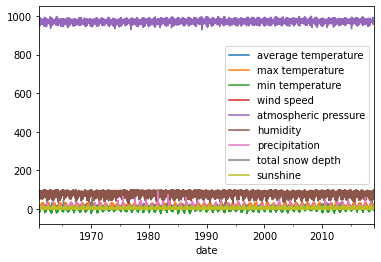

In [49]:
ruzyne_tidy.plot()

There's not much to see there. One of the problems is the different range of quantities. And we could also enlarge the graph a bit.

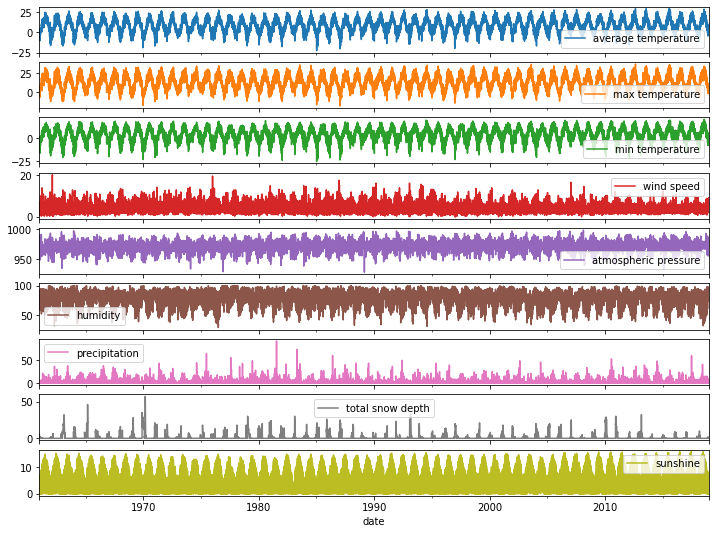

In [50]:
ruzyne_tidy.plot(subplots=True, figsize=(12, 9))

This is a not really useful either, there is too little to see on the chart. The default `line` chart is usually suitable for time series.
Using the `layout` argument, we can arrange subgraphs into multiple columns. In addition, if we choose a shorter time period, we get a completely understandable result.

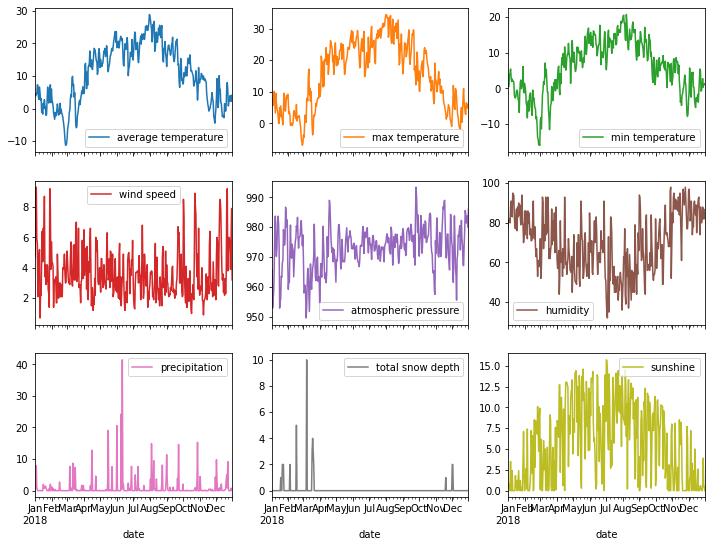

In [51]:
ruzyne_tidy[ruzyne_tidy.index.year == 2018].plot(
    subplots=True, layout=(3, 3), figsize=(12, 9)
);

But even there is quite a lot of data and we see a lot of variance in the graphs - the values jump up / down quickly. In that case, it's time to take the statistics to help!

## A little statistic - really just basic
It is not the aim of this course (nor in its capabilities) to teach statistics in detail and rigorously. We will certainly master the simple basics, and we will make sure that they are also useful.
If you want to know more, take a look at https://www.poritz.net/jonathan/share/ldlos.pdf, or at http://greenteapress.com/thinkstats2/thinkstats2.pdf or at Bayesian Statistics http://www.greenteapress.com/thinkbayes/thinkbayes.pdf.

The [`DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method is an easy choice for obtaining basic statistics of whole tables.

In [54]:
ruzyne_tidy.describe()

,average temperature,max temperature,min temperature,wind speed,atmospheric pressure,humidity,precipitation,total snow depth,sunshine
count,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000
mean,8.417896,12.970143,4.078795,4.179343,972.431085,76.577747,1.399901,1.052020,4.728998
std,8.184324,9.472715,7.223863,2.234592,8.062309,12.406828,3.832025,3.746289,4.271356
min,-22.600000,-18.300000,-25.500000,0.000000,928.700000,29.000000,0.000000,0.000000,0.000000
25%,2.100000,5.200000,-0.700000,2.700000,967.600000,68.000000,0.000000,0.000000,0.500000
50%,8.700000,13.300000,4.400000,3.700000,972.800000,78.000000,0.000000,0.000000,3.900000
75%,14.900000,20.500000,9.900000,5.300000,977.600000,86.000000,1.000000,0.000000,8.100000
max,29.500000,37.400000,20.700000,20.300000,998.700000,100.000000,93.300000,57.000000,15.700000


For each column we see several summary (statistical data).
* `count` indicates the number of values.
* `mean` is the mean, calculated as the arithmetic mean.
* `std` is the standard deviation that shows the variance of the data - how much we can expect the data in the file to differ from the mean.
* `min` and` max` are the smallest and largest values in the column.
* Percentages denote quantiles, `25 %` and` 75 %` being the value of the first and third "quartiles". If we sort the column by size, a quarter of the data will be smaller than the value of the first quartile, and a quarter of the data will be larger than the value of the third quartile. Specifically, a quarter of all days in our data had a minimum temperature of less than -0.7 ° C and a quarter of days had a maximum temperature of more than 20.5 ° C.
* `50 %` is called the median - half of the data is smaller than the median (and the other half is obviously larger than the median).
In a moment we will show you how these values are related to the distribution function and everything will be clearer to you right away :)

Of course, we can also use `describe` on some subset of data. This is how the weather statistics in Ruzyne in January look like.

In [42]:
ruzyne_tidy[ruzyne_tidy.index.month == 1].describe()

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,-1.608231,1.089989,-4.499722,4.703059,973.081869,85.147386,0.728754,4.538932,1.714405
std,5.204560,5.042629,5.737259,2.977468,10.237599,7.383823,1.546440,6.269001,2.247083
min,-22.600000,-18.300000,-25.500000,0.000000,933.900000,54.000000,0.000000,0.000000,0.000000
25%,-4.675000,-2.000000,-8.000000,2.300000,965.925000,80.000000,0.000000,0.000000,0.000000
50%,-1.000000,1.200000,-3.450000,4.000000,973.300000,86.000000,0.000000,1.000000,0.500000
75%,1.900000,4.400000,-0.300000,6.700000,980.475000,91.000000,0.700000,7.000000,3.000000
max,12.500000,15.800000,8.500000,19.700000,997.700000,100.000000,14.700000,30.000000,8.400000


### Statistical distribution
Let's try terms around probability, such as distribution functions or probability densities, whose formal definitions and properties can be found in books (eg those listed above) or on [wikipedia](https://en.wikipedia.org/wiki/Distribu%C4%8Dn%C3%AD_function).
One of the basic and extremely useful tools for visualizing a data set is the [histogram](https://en.wikipedia.org/wiki/Histogram). Simply put, the histogram creates kennels according to the size of the data - each kennel has data in some interval from - to. The number of values that fall from a given data set into a given bin determines the size (height) of the bin.
Use the `.plot.hist()` to display the histogram

<AxesSubplot:ylabel='Frequency'>

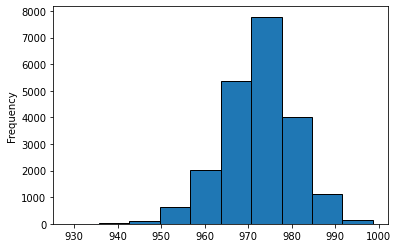

In [55]:
ruzyne_tidy["atmospheric pressure"].plot.hist(edgecolor = "black")

The histogram tells us that somewhere in the range 971 - 978 are the most values (almost 8000). The surrounding kennels have a slightly smaller size, 964 - 971 about 5000, 978 - 985 about 4000. At the edges are only low kennels, a kind of tails.
Think - if we choose one day at random.
1. From which (one) of the kennels in the graph will the pressure most often lie?
2. What 5 kennels would you choose to have a really big chance that the pressure on the chosen day will be in one of these kennels?
If you can answer the questions, you already know that the histogram indicates *the probability density* and that this density can be added, giving a *cumulative probability*, or *distribution function*.

The definition is actually quite simple (source [wikipedia](https://en.wikipedia.org/wiki/Distribu%C4%8Dn%C3%AD_funkce)):
&gt; The distribution function, the distribution function (probability) or (rather folk) (from the left) the cumulative distribution function (CDF) is a function that indicates the probability that the value of a random variable is less than the specified value.
Probability density expresses how much "probability" will increase in a given interval, or how much the distribution function will change. Mathematically, the probability density is the derivative of the distribution function.

A relatively important parameter in the histogram is the number of bins. When there are few of them, important information can disappear, and the power of the histogram can be lost.
For our data, a histogram with thirty bins looks quite reasonable.

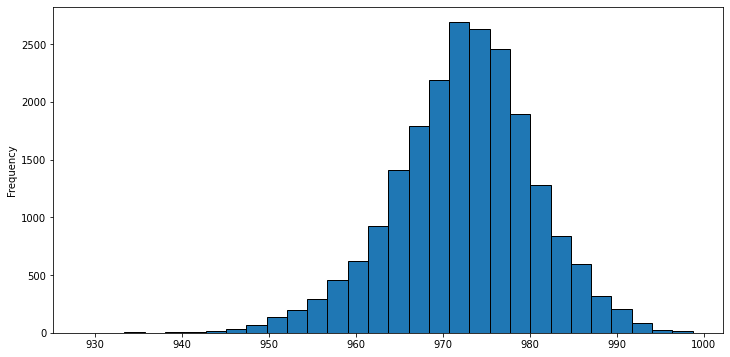

In [56]:
ruzyne_tidy["atmospheric pressure"].plot.hist(bins=30, figsize=(12, 6), edgecolor="black");

The argument `cumulative = True` then shows us a sequential (cumulative) sum of the size of the bins. We will also use `density = True` to display the distribution function. Thus the graph tells us what is the probability (value on the vertical axis) that the pressure will be less than the given value (on the horizontal axis).
Vertical lines for mean (black), median (red) and 25% and 75% quantiles (dashed red) are also added to the graph.

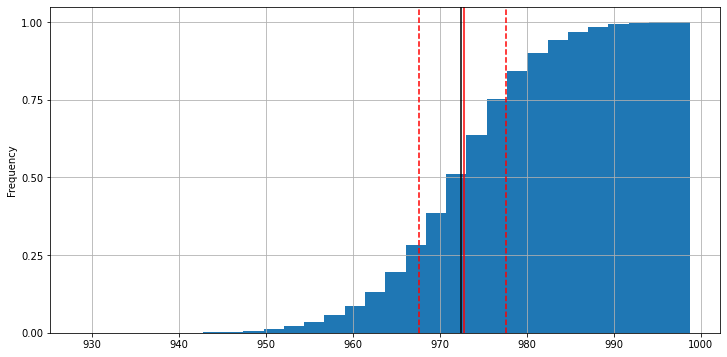

In [57]:
ax = ruzyne_tidy["atmospheric pressure"].plot.hist(bins=30, figsize=(12, 6), cumulative=True, density=True, grid=True
)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.axvline(ruzyne_tidy["atmospheric pressure"].mean(), color="k")
ax.axvline(ruzyne_tidy["atmospheric pressure"].median(), color="r")
ax.axvline(ruzyne_tidy["atmospheric pressure"].quantile(0.25), color="r", ls="--")
ax.axvline(ruzyne_tidy["atmospheric pressure"].quantile(0.75), color="r", ls="--")

Let's see what the histograms of all nine features look like.

array([[<AxesSubplot:title={'center':'average temperature'}>,
        <AxesSubplot:title={'center':'max temperature'}>,
        <AxesSubplot:title={'center':'min temperature'}>],
       [<AxesSubplot:title={'center':'wind speed'}>,
        <AxesSubplot:title={'center':'atmospheric pressure'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'precipitation'}>,
        <AxesSubplot:title={'center':'total snow depth'}>,
        <AxesSubplot:title={'center':'sunshine'}>]], dtype=object)

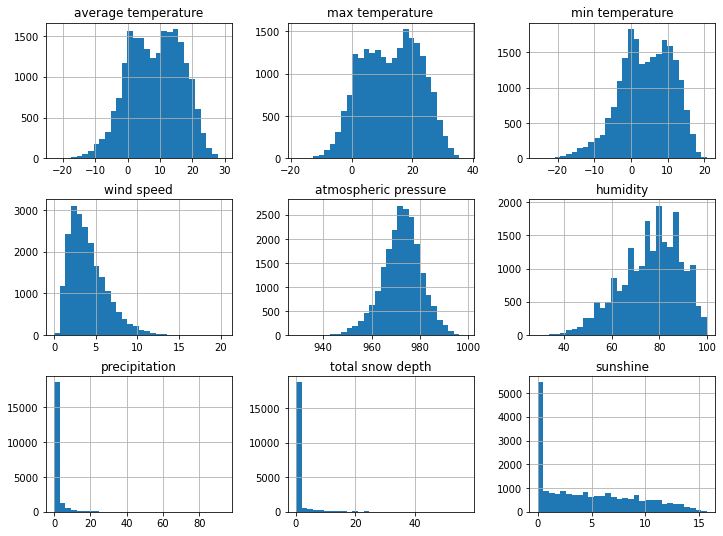

In [58]:
ruzyne_tidy.hist(figsize=(12, 9), bins=30)

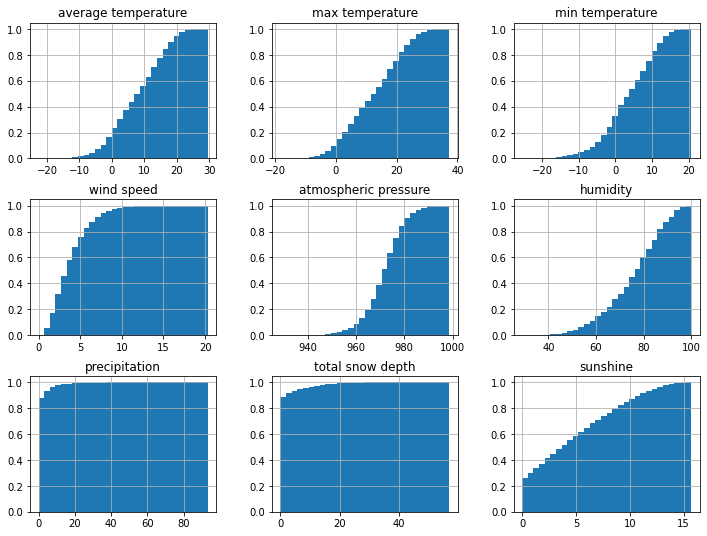

In [8]:
ruzyne_tidy.hist(figsize=(12, 9), bins=30, cumulative=True, density=True);

It is quite interesting and convenient that we get a relatively nice variety of different types of distribution functions. The air pressure is approximately **[normal (Gaussian) distribution](https://cs.wikipedia.org/wiki/Norm%C3%A1ln%C3%AD_rozd%C4%9Blen%C3%AD)**. You may have heard of it because it occurs and is used quite often (sometimes too often).

It is interesting that the temperature has a so-called **bi-modal distribution** - there are two maxima on the histogram. For other quantities, we can wonder which of [many known distributions](https://en.wikipedia.org/wiki/Log-normal_distribution) would be more or less suitable for their description. Logarithmic-normal to wind speed? Any exponential (or generally gamma) distribution of snow depth, total precipitation and possibly sunshine? Let's leave this to a more detailed course in statistics, meteorology or climatology :)

However, diverse distribution functions allow us to show some properties of the mean and median. These are (together with modes, ie probability density maxima) indicators of the tendency in the dataset. The median and mean value do not usually differ much and in "nice" (symmetric) distributions, such as the normal distribution, are identical. They will differ especially when the distribution is skewed or if there are outliers in the data - [outliers](https://en.wikipedia.org/wiki/Outlier).

We'll wrap the histogram plot function along with the mean and quantiles we used earlier. Then we use the very useful library [seaborn](https://seaborn.pydata.org) to plot histograms for individual quantities.

In [10]:
def hist_plot_with_extras(data, bins=30, cumulative=False, density=False, **kwargs):
    """Plot histogram with mean and quantiles"""
    ax = kwargs.pop ("ax", plt.gca())    
    ax.hist(data, bins=bins, cumulative=cumulative, density=density, **kwargs)
    ax.grid(True)
    if density:
        ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.axvline(data.mean(), color="k")
    ax.axvline(data.median(), color="r")
    ax.axvline(data.quantile(0.25), color="r", ls="--")
    ax.axvline(data.quantile(0.75), color="r", ls="--")
    return ax

Note the use of `.melt ()` - seaborn expects data in one column, individual graphs are then formed base on the value of another column. We actually created a categorical variable "value".
Now we can use [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), which creates a set of graphs, divided into a grid according to some data property (category).

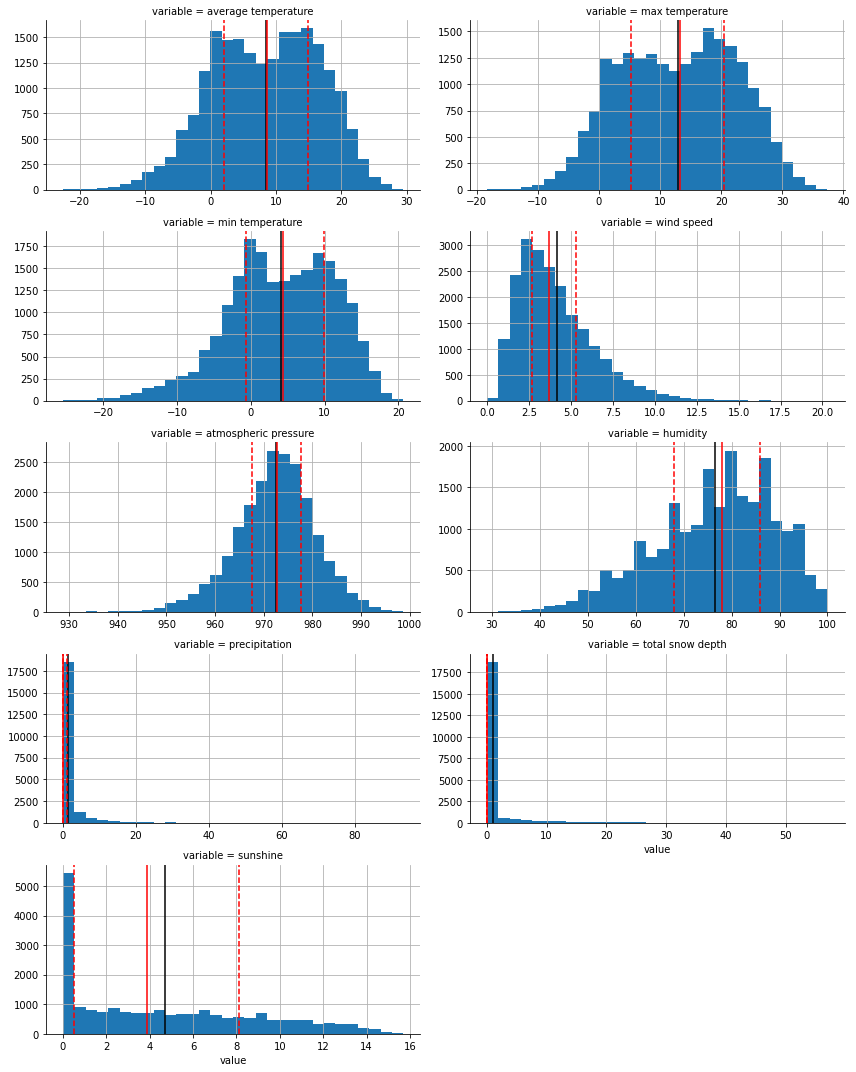

In [11]:
grid = sns.FacetGrid(ruzyne_tidy.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
sharex = False,    aspect=2,
)
grid.map(hist_plot_with_extras, "value");

In addition to the histogram, it is very often used to display the distribution of the so-called [boxplot](https://en.wikipedia.org/wiki/Boxplot). The "box" (rectangle) in the middle defines the area between the first and third quartiles (Q1 and Q3), the dividing line corresponds to the median, and the "beard" (whiskers) indicates the range of data. By default, this is the last point that is less than/greater than 1.5 times the "inter-quartile range" IQR, `IQR = Q3 - Q1`. This range is usually considered to be the limit for outliers, which are then marked in the box as symbols (diamonds in our case).

C:\Users\krike\Desktop\pyladies_vienna\pyladies_vienna_data_course\venv\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


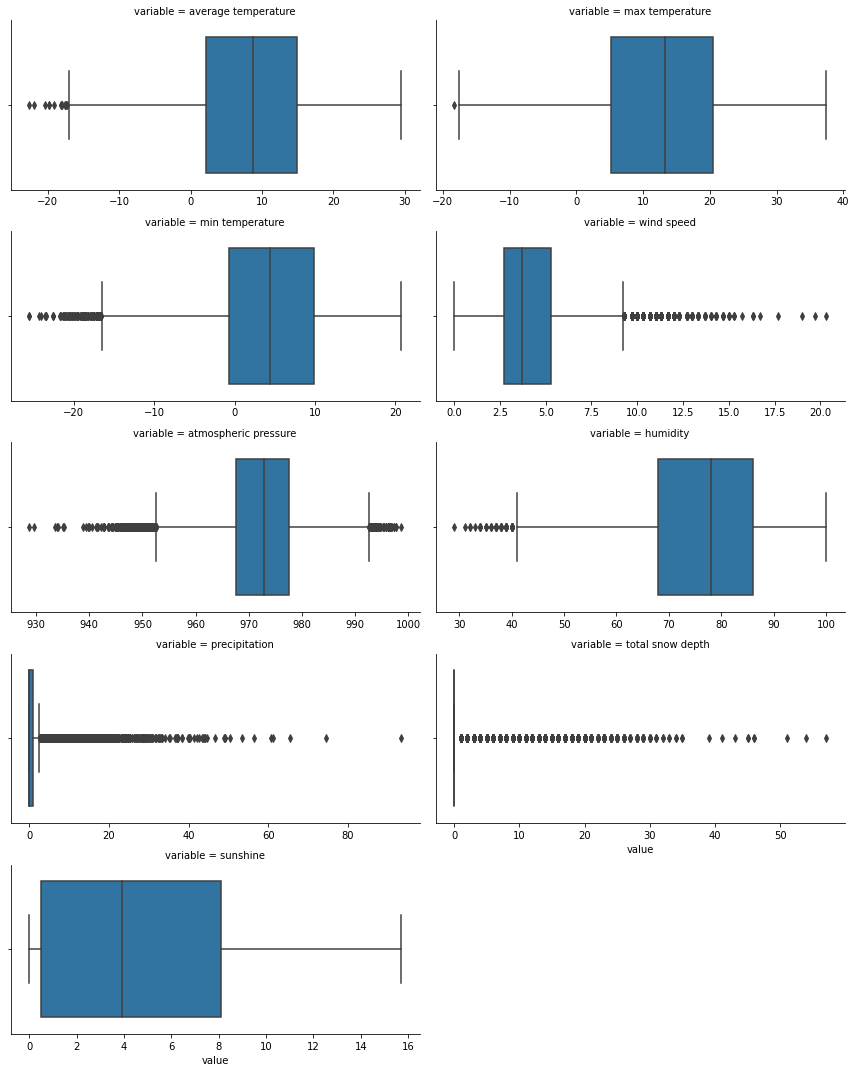

In [12]:
grid = sns.FacetGrid(ruzyne_tidy.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
sharex = False,    aspect=2,
)
grid.map(sns.boxplot, "value");

Seaborn can often be used very easily if we display one quantity, and sometimes even "wide-format" data. For our data, we can compare the average, minimum and maximum temperature. To help, we take [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html), which creates a graph (or a set of graphs) of various types (boxplot or violinplot) from data containing one or more categorical variables.

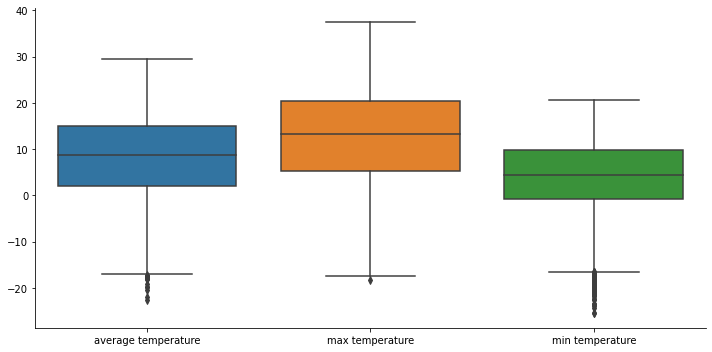

In [14]:
sns.catplot(data = ruzyne_tidy [["average temperature", "max temperature", "min temperature"]], kind="box",
    aspect=2,
);

**Homework**:

Fill in the auxiliary columns `season` and` significant_precipitation` (surely you can guess what pandas type they will be :). 
The first defines the season (simply by calendar months), the second indicates the days when the precipitation was higher than in **90%** of all days in our data (you can try another limit).
1. Compare numerically the basic statistics of the whole dataset and the subset when it rained or snowed significantly. Do precipitation increase on average temperature? And what about maximum or minimum? And what about the standard deviation?
2. Use `sns.catplot` to visually compare the distribution functions for each season and low/high day.

In [ ]:
season = ruzyne_tidy.index.___.map({
1: "winter",2: "winter",3: "year",    ...
 })

significant_precipitation = ruzyne_tidy ["total precipitation"]&gt; ruzyne_tidy [___] .quantile (___)

In [ ]:
# task - simple comparison of statistics using difference(ruzyne_tidy.loc[___]
 .describe()
) - \
ruzyne_tidy.___()

In [ ]:
# task - visual comparison of statisticssns.catplot(    data=ruzyne_tidy.assign(
        significant_precipitation=___, 
        season=___,
    ),
    kind="box",
    aspect=2,
    hue=___,
y=___,    x=___,
);